# AI Community @ Семинар № 8
## Основы OpenCV. Цветовые пространства и фильтры изображений

In [1]:
import cv2
import numpy as np
from skimage.io import *
from PIL import Image

import matplotlib.pyplot as plt

%matplotlib inline

Изображение в главной роли взято из [статьи](https://www.dpreview.com/articles/6497352654/get-more-accurate-color-with-camera-calibration-).

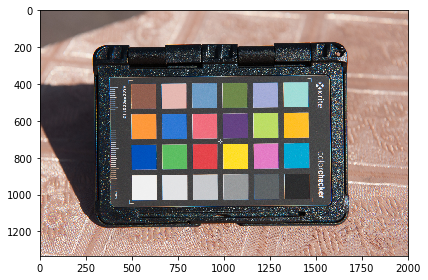

In [41]:
img = cv2.imread('images/color_palette.jpeg')
# Цветные изображения в OpenCV считываются как BGR, поэтому сразу развернем каналы в RGB
rgb = img[:, :, ::-1]
imshow(rgb)

### RGB

<img src=images/rgb.png width=300>
[Источник изображения](https://en.wikipedia.org/wiki/RGB_color_model)

Цветовая модель **RGB (Red, Green, Blue)** - аддитивная, что означает, цвет является смешением в определенном соотношении нескольких компонентов. В данном случае три цвета (красный, зеленый и голубой) смешиваются, взяв как базовый черный цвет.
В RGB каждый из 3-х каналов изображения отвечает за интенсивность пикселей соответствующего цвета. Иначе говоря, каждый пиксель кодируется вектором из трех значений.

***Применение:***
RGB используется для отображения контента на экранах многих цифровых устройств. В самом деле, исходный цвет пикселя дисплея - черный. "Зажигая" (добавляя) с определенной интенсивностью компоненты пикселя, получаются различные оттенки.

In [3]:
rgb.shape

(1333, 2000, 3)

In [14]:
def show_stacked(img):
    img_stacked = np.hstack([img[..., 0], img[..., 1], img[..., 2]])

    plt.figure(figsize=(20, 20))
    imshow(img_stacked)

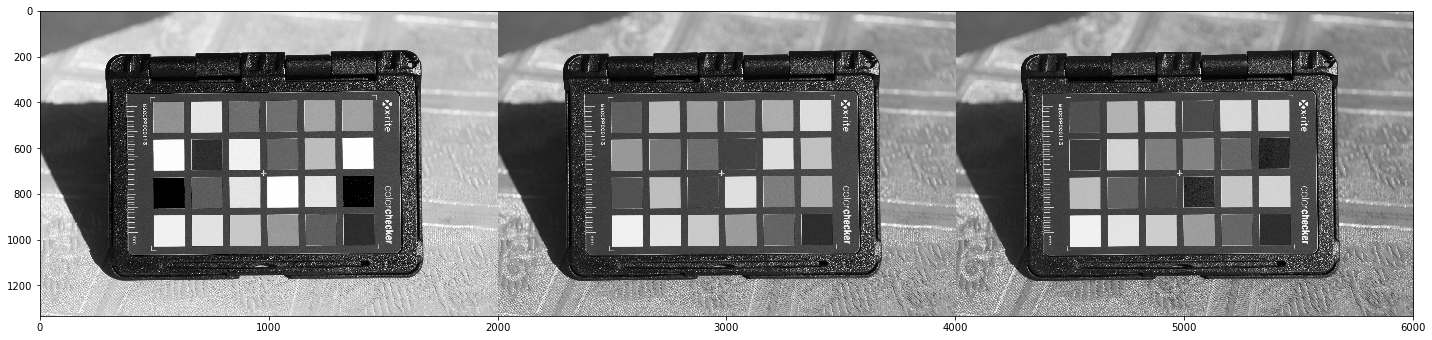

In [15]:
show_stacked(rgb)

0 - наименьшая интенсивность (черный), 255 - наибольшая (белый). Рассмотрите внимательно все три канала и сделайте вывод, как распределены интенсивности определенных оттенков цвета.

In [16]:
print('Ranges for Red: [{}, {}], Green: [{}, {}], Blue: [{}, {}]'
      .format(rgb[..., 0].min(), rgb[..., 0].max(),
      rgb[..., 1].min(), rgb[..., 1].max(),
      rgb[..., 2].min(), rgb[..., 2].max()))

Ranges for Red: [0, 255], Green: [0, 255], Blue: [0, 255]


### CMYK

Другой тип цветовой модели - субтрактивная модель, в которой оттенок получается путем вычета цветов из белого. Примером послужит **CMYK (Cyan, Mangenta, Yellow, blacK)**.
<img src=images/cmyk.gif width=300>
[Источник изображения](https://ru.wikipedia.org/wiki/CMYK)

***Применение:***
CMYK широко используется в типографии, поскольку необходимо из белого цвета "вычитать" компоненты для получения оттенка.

### Изображение в оттенках серого (Grayscale)

В Grayscale изображениях каждый пиксель представлен только одним каналом, который отражает его интенсивность.

***Применение:***
Grayscale используется в случаях, когда устройство не может отображать многоканальные данные (старые телевизоры) или информация о цвете является излишней (например, для поиска тех же прямоугольников на этом изображении будет достаточно обработать его Grayscale версию)

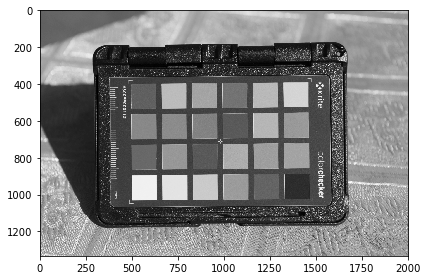

In [19]:
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
imshow(gray)

В grayscale изображении интенсивность каждого пикселя представляетя только одним значением от 0 до 255. Обратите внимание на shape нашего изображения

In [20]:
gray.shape

(1333, 2000)

In [23]:
print('Range for Gray: [{}, {}]'
      .format(gray.min(), gray.max()))

Range for Gray: [0, 255]


**Grayscale своими руками**

Один из способов получить серое изображение из RGB это применить следующую трансформацию:
$$Y = 0.299\cdot R + 0.587\cdot G + 0.114\cdot B$$
Почему зеленому придают больший вес?

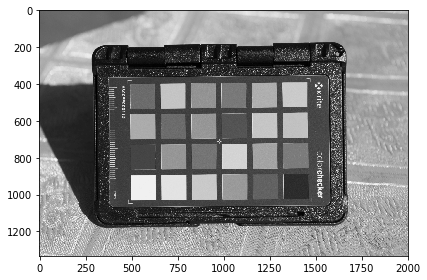

In [38]:
Y = 0.299*rgb[..., 0] + 0.587*rgb[..., 1] + 0.114*rgb[..., 2]
Y = Y.astype('uint8')
imshow(Y)

### HSV / HSL

H - Hue (Оттенок), S - Saturation (Насыщенность), V - Value (Интенсивность)

<img src=images/hsv.png width=500>
[Источник картинки](https://en.wikipedia.org/wiki/HSL_and_HSV)

Значения **Оттенка (Hue)** варьируются от 0 до 360, что представляет весь цветовой спектр. **Насыщенность (Saturation)** отвечает за то, насколько конкретный цвет из спекрта отличается от нейтрального серого (значения варьируются от 0 до 1). Интенсивность (Value) показывает, насколько "много" определенного цвета в данном пикселе (значения от 0 до 1).

***Применение:***
HSV используется всегда, когда необходимо отделить компоненту интенсивности из изображения, при этом не потеряв информацию о цвете. Один из примеров, который рассмотрим далее - выравнивание гистограммы изображения. Этого эффекта можно также добиться и с помощью других цветовых схем, например, YCbCr, Lab и пр.

In [24]:
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)

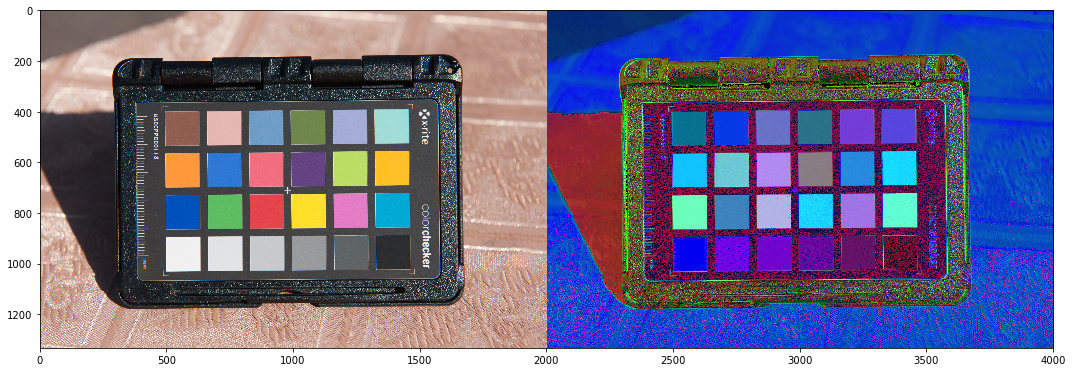

In [37]:
plt.figure(figsize=(15, 15))
imshow(np.hstack([rgb, hsv]))

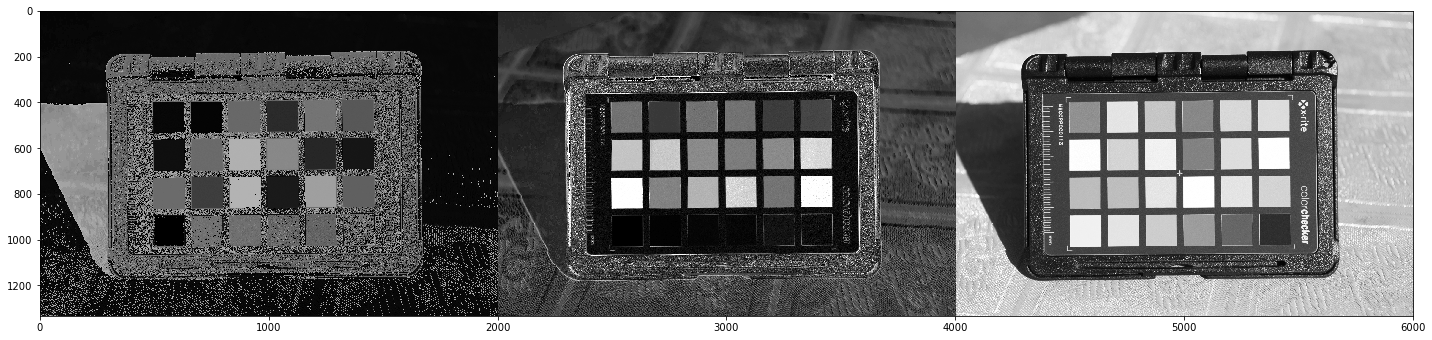

In [38]:
show_stacked(hsv)

В OpenCV диапазоны цветов для каналов HSV представлены немного другие:  
Hue $\in$ [0, 179], Saturation $\in$ [0, 255], Value $\in$ [0, 255]

In [39]:
print('Ranges for Hue: [{}, {}], Saturation: [{}, {}], Value: [{}, {}]'
      .format(hsv[..., 0].min(), hsv[..., 0].max(),
      hsv[..., 1].min(), hsv[..., 1].max(),
      hsv[..., 2].min(), hsv[..., 2].max()))

Ranges for Hue: [0, 179], Saturation: [0, 255], Value: [0, 255]


### YUV / Y'UV / YCbCr / ...

**YUV** - Цветовая модель, в которой:  
Y - яркостная составляющая  
U представляет цвет как разность голубой компоненты и интенсивности Y  
V представляет цвет как разность красной компоненты и интенсивности Y

Одна из возможных конвертаций:
$$Y = 0.299\cdot R + 0.587\cdot G + 0.114\cdot B$$
$$U \approx 0.492\cdot(B-Y)$$
$$V \approx 0.877\cdot(R-Y)$$

При таком конвертировании диапазоны значений будут следующими:
$$Y \in [0,1] \text{, } U \in [-0.436, 0.436] \text{, } V \in [-0.615, 0.615]$$

<img src=images/yuv.svg width=300>
[Источник изображения](https://en.wikipedia.org/wiki/YUV)

Есть множество вариаций цветовой модели YUV. Например:  
**Y'UV** - пространство, в котором компонента Y' представляет Y, полученную после [гамма-коррекции](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BA%D1%86%D0%B8%D1%8F).  
**YCbCr** - похожее пространство, только компоненты Cb(U), Cr(V) вычисляются несколько иначе. Про YUV говорят, когда речь идет об аналоговой обработке изображений, про YCbCr - о цифровой.

***Применение:***
YUV используется как промежуточный этап обработки изображения при его проходе от источника (например, камеры) к приемнику (например, экрану ноутбука). Изначально применялся для того, чтобы обеспечить совместимость старых телевизоров, отображающих только картинку в оттенках серого, с новыми станциями, передающими цветное изображение.

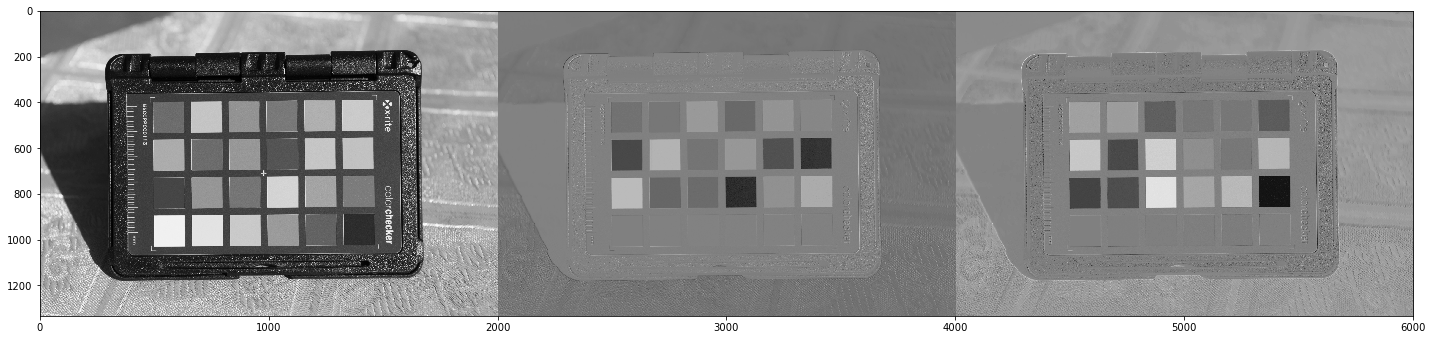

In [49]:
yuv = cv2.cvtColor(rgb, cv2.COLOR_RGB2YUV)
show_stacked(yuv)

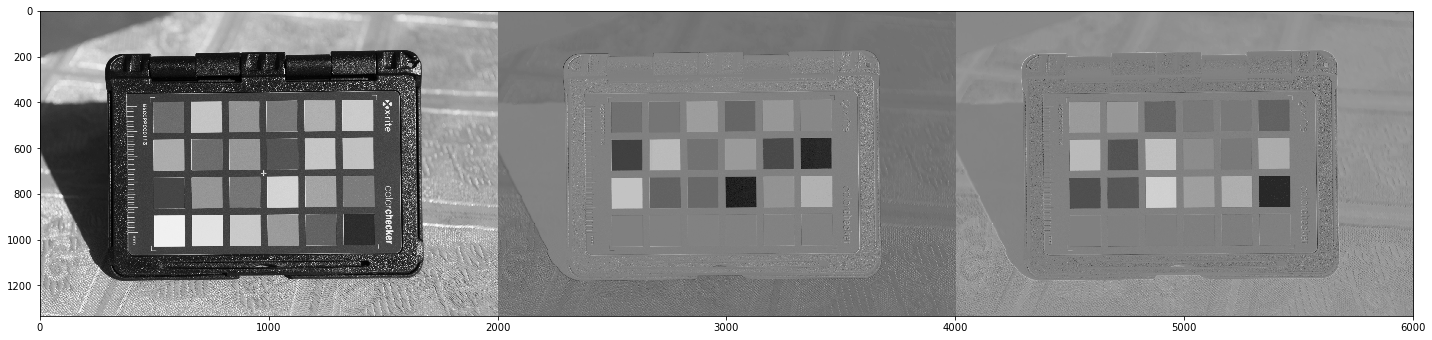

In [50]:
ycbcr = cv2.cvtColor(rgb, cv2.COLOR_RGB2YCrCb)
ycbcr = np.dstack([ycbcr[..., 0], ycbcr[..., 2], ycbcr[..., 1]])
show_stacked(ycbcr)

In [51]:
print('Ranges for Y: [{}, {}], U: [{}, {}], V: [{}, {}]'
      .format(yuv[..., 0].min(), yuv[..., 0].max(),
      yuv[..., 1].min(), yuv[..., 1].max(),
      yuv[..., 2].min(), yuv[..., 2].max()))

Ranges for Y: [0, 255], U: [25, 203], V: [11, 234]


Обратите внимание, что разница между YUV и YCbCr очень незначительная

In [52]:
np.allclose(yuv[..., 0], ycbcr[..., 0])

True

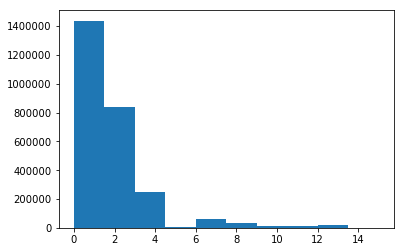

In [53]:
plt.hist((np.abs(yuv[..., 1:2].astype('float') - ycbcr[..., 1:2].astype('float'))).ravel());

### Выравнивание гистограммы

Выравнивание гистограммы (histogram equalization) - метод улучшения контрастности изображения путем "растягивания" его гистограммы интенсивностей.

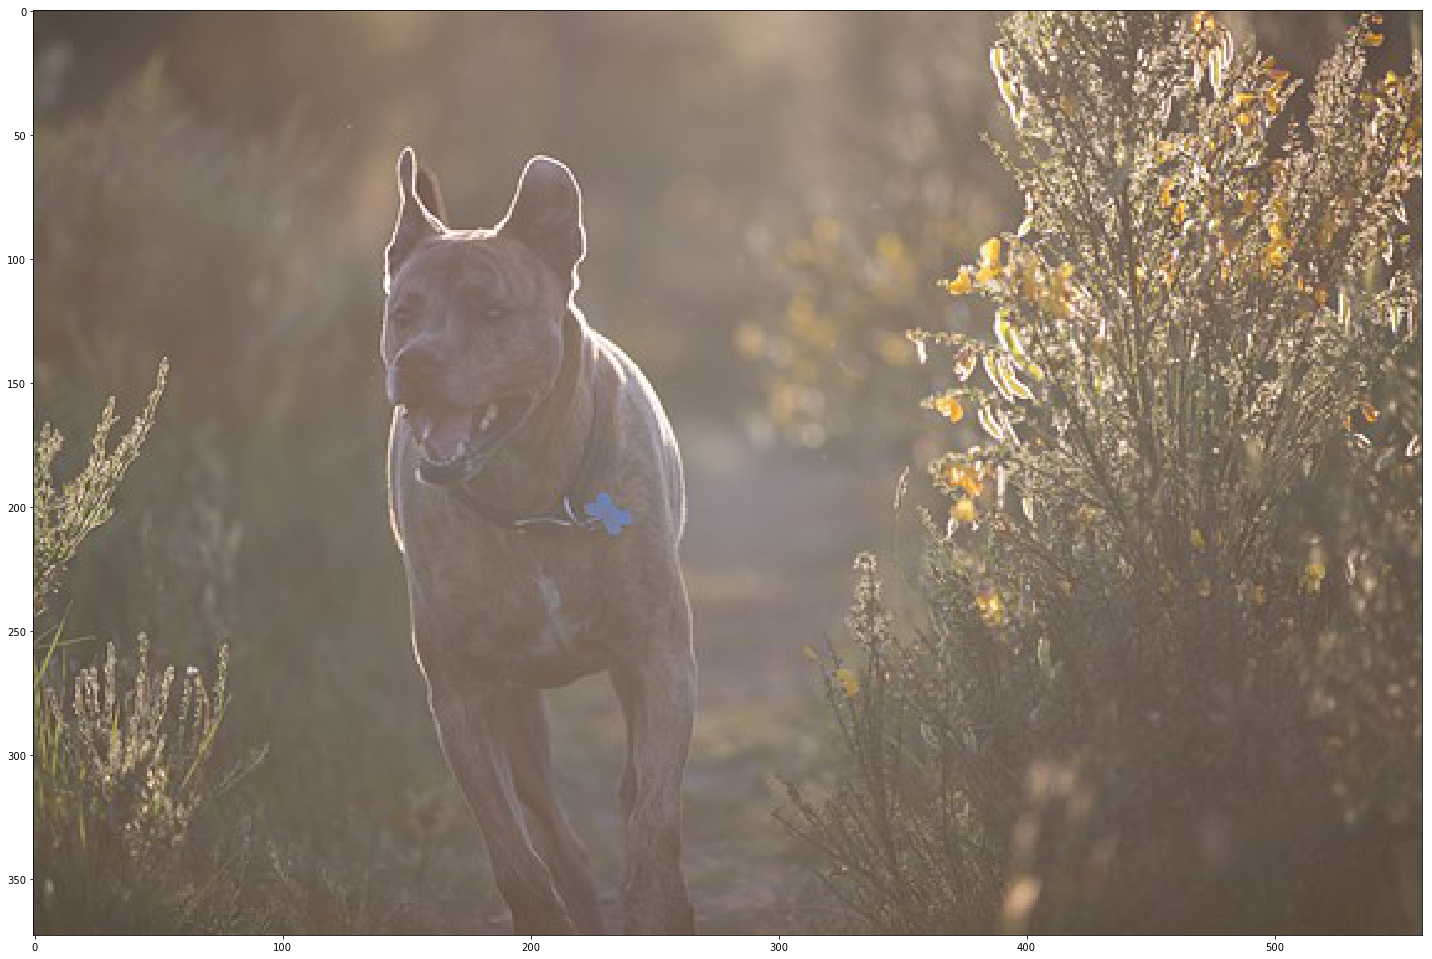

In [54]:
img = cv2.imread('images/dog.jpeg')
img = img[..., ::-1]

plt.figure(figsize=(20, 20))
imshow(img)

In [55]:
def fig2data (fig):
    """
    Source: http://www.icare.univ-lille1.fr/tutorials/convert_a_matplotlib_figure
    """
    
    fig.canvas.draw()
 
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring (fig.canvas.tostring_argb(), dtype=np.uint8)
    buf.shape = (w, h, 4)
 
    buf = np.roll(buf, 3, axis=2)
    w, h, d = buf.shape
    
    return Image.frombytes("RGBA", (w ,h), buf)

def plot_hist_as_img(data, bins=256):
    fig = plt.figure()
    plot = fig.add_subplot(111)
    plot.hist(data, bins=256);
    plt.close()
    plot_img = fig2data(fig)
    
    return np.array(plot_img)

In [56]:
def equalize_hist_color_img(img):
    # Конвертируем изображение в YUV
    yuv_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    
    # Берем компоненту интенсивности Y
    y = yuv_img[..., 0]
    # Построим гистограмму для Y
    y_hist = plot_hist_as_img(y.ravel())
    
    # Выравняем гистограмму Y
    y_img_equalized = cv2.equalizeHist(yuv_img[..., 0])
    # Проверим результат
    y_equalized_hist = plot_hist_as_img(y_img_equalized.ravel())
    
    # Соберем новое YUV изображение, заменив в нем только компоненту Y
    yuv_img_equalized = np.dstack([y_img_equalized, yuv_img[..., 1], yuv_img[..., 2]])
    # Сконвертируем обратно в RGB
    img_equalized = cv2.cvtColor(yuv_img_equalized, cv2.COLOR_YUV2RGB)

    # Отрисуем эксперимент
    res = np.vstack([
        np.hstack([img,
                   cv2.cvtColor(y, cv2.COLOR_GRAY2RGB),
                   cv2.resize(y_hist[..., :3], img.shape[:2][::-1])]),
        np.hstack([img_equalized,
                   cv2.cvtColor(y_img_equalized, cv2.COLOR_GRAY2RGB),
                   cv2.resize(y_equalized_hist[..., :3], img.shape[:2][::-1])])
    ])
    
    plt.figure(figsize=(20, 20))
    imshow(res)
    plt.axis('off')

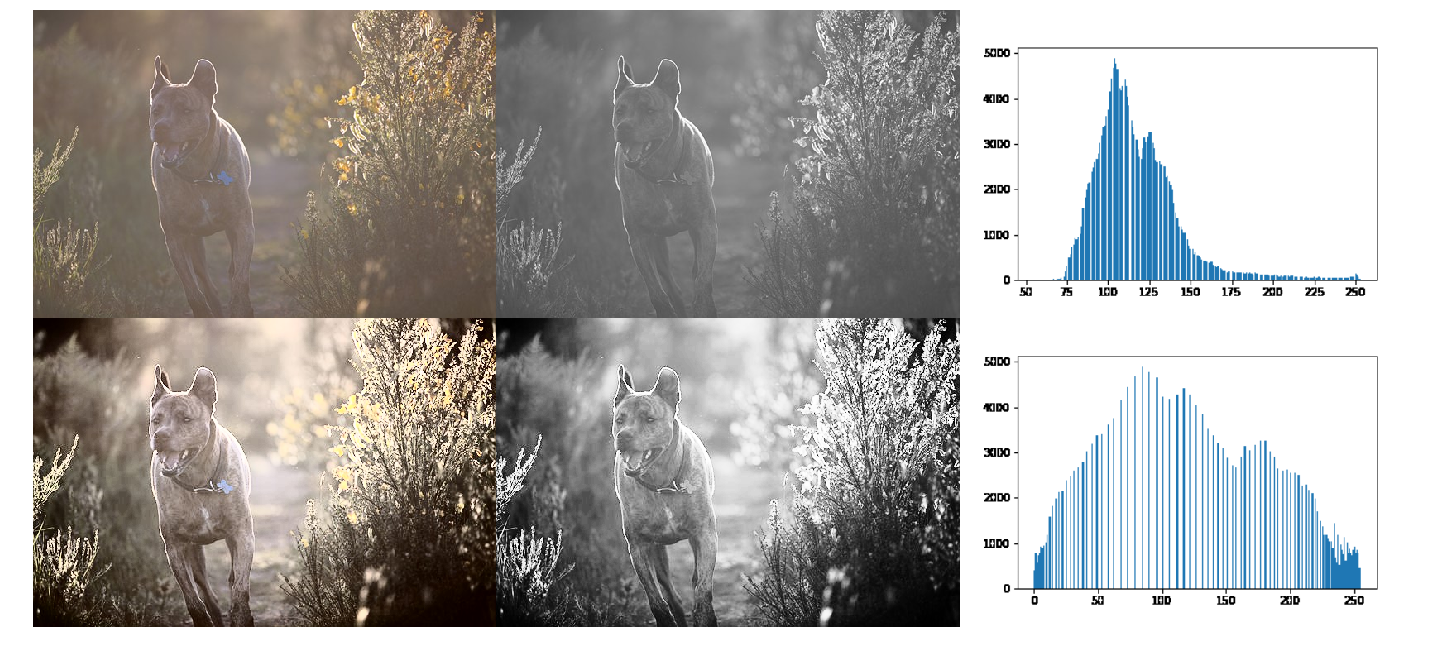

In [51]:
equalize_hist_color_img(img)

Подробнее про выравнивание гистограммы на [Википедии](https://en.wikipedia.org/wiki/Histogram_equalization). Для вашей практики можете реализовать алгоритм самостоятельно.

### Пример поиска красного сигнала сфетофора

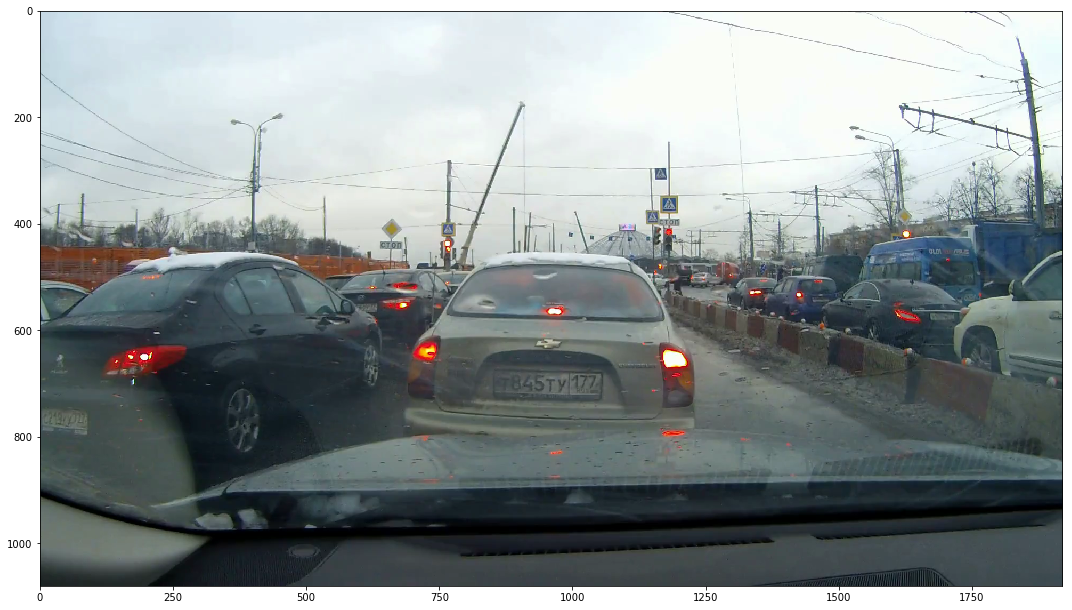

In [57]:
img = imread('images/red_traffic_light.png')
plt.figure(figsize=(15, 15))
imshow(img)

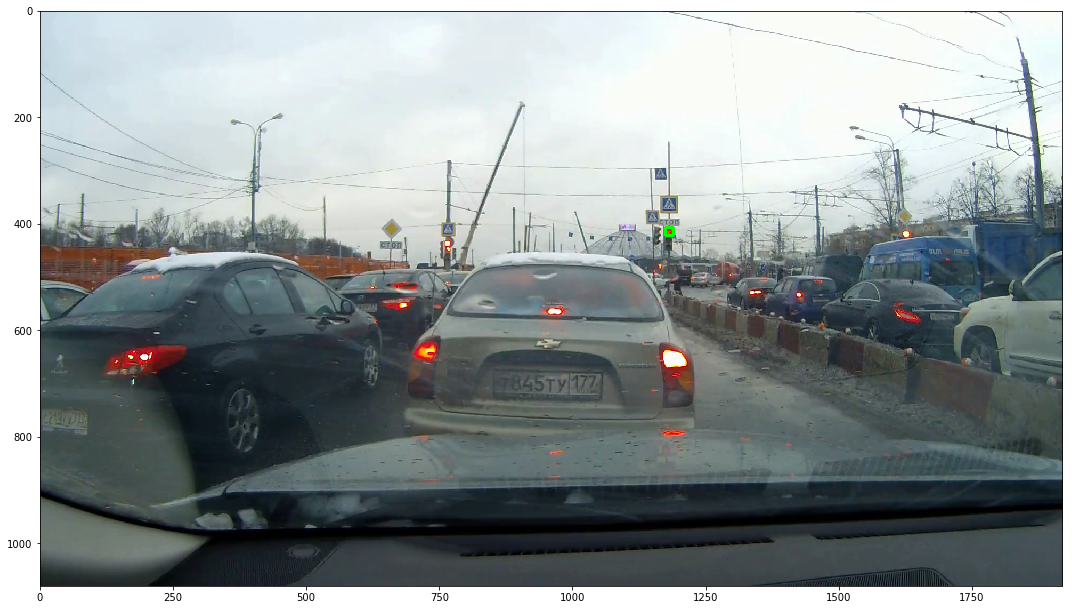

In [59]:
x, y = 407, 1173
h, w = 15, 15
image = cv2.rectangle(img.copy(), (y, x), (y + w, x + h), color=(0, 255, 0), thickness=4)

plt.figure(figsize=(15, 15))
imshow(image)

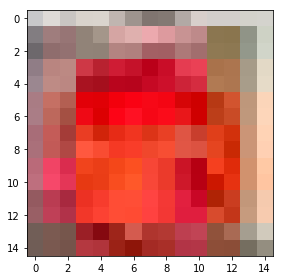

In [60]:
light = img[x:x + h, y:y + w]
imshow(light)

In [61]:
light.mean(axis=(0, 1))

array([ 198.77777778,   90.03111111,   82.35111111])

In [62]:
light.std(axis=(0, 1))

array([ 37.92863995,  59.1596252 ,  55.49531561])

In [63]:
light.min(), light.max()

(0, 255)

/Users/Sonya/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


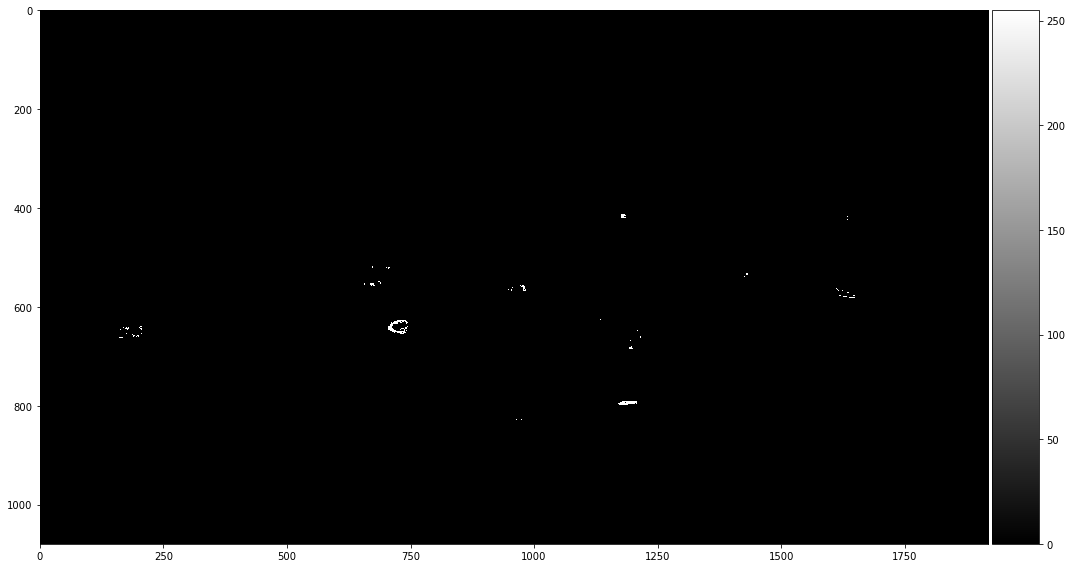

In [64]:
std = light.std(axis=(0, 1))
picked = light[8, 6]

light_mask = cv2.inRange(img, picked - std, picked + std)

plt.figure(figsize=(15, 15))
imshow(light_mask, cmap='gray')

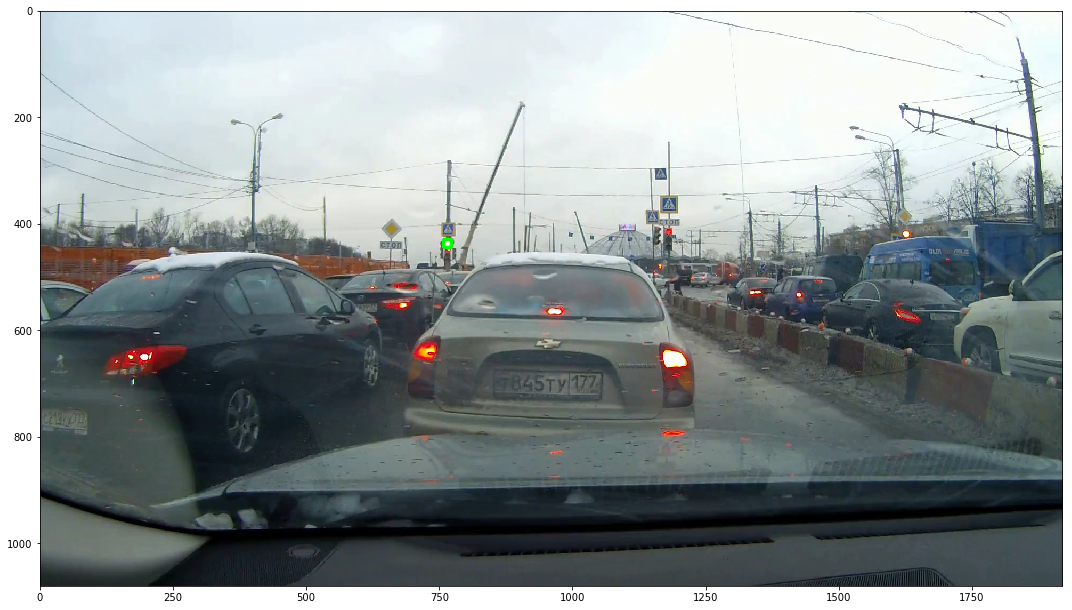

In [66]:
x, y = 430, 757
h, w = 15, 15
image = cv2.rectangle(img.copy(), (y, x), (y + w, x + h), color=(0, 255, 0), thickness=4)

plt.figure(figsize=(15, 15))
imshow(image)

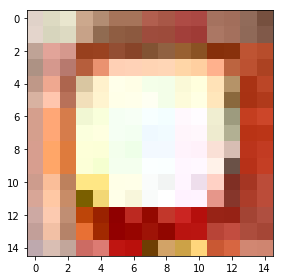

In [67]:
light = img[x:x + h, y:y + w]
imshow(light)

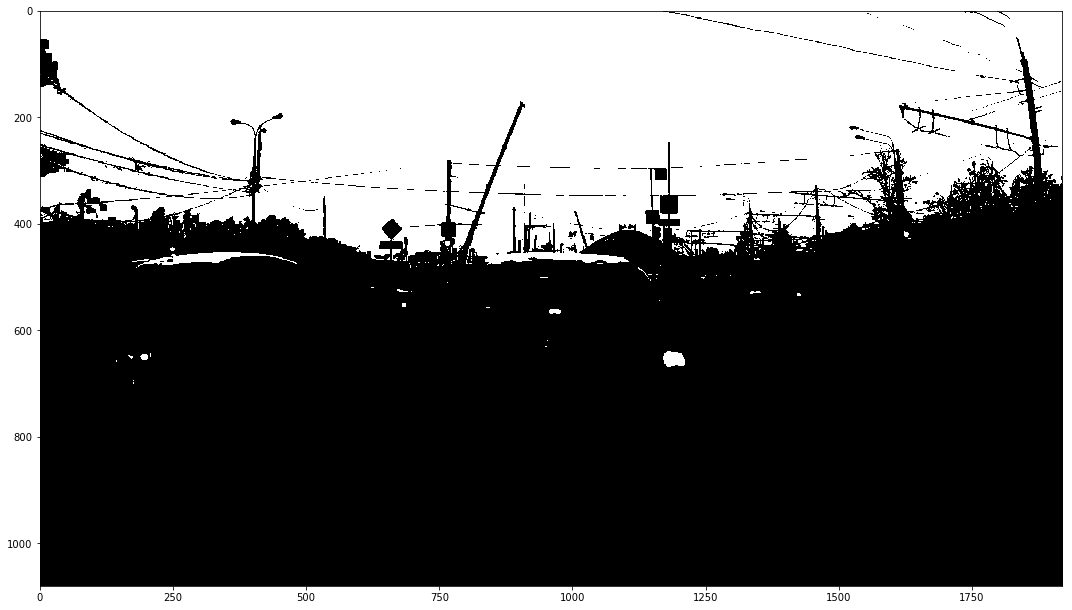

In [68]:
std = light.std(axis=(0, 1))
picked = light[8, 6]

light_mask = cv2.inRange(img, picked - std, picked + std)

plt.figure(figsize=(15, 15))
imshow(light_mask, cmap='gray')

In [69]:
hsv_road = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [70]:
x, y = 407, 1173
h, w = 15, 15

hsv_light = hsv_road[x:x + h, y:y + w]
std = hsv_light.std(axis=(0, 1))
picked = hsv_light[8, 6]

lower_red = picked - std*2
upper_red = picked + std*2

/Users/Sonya/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


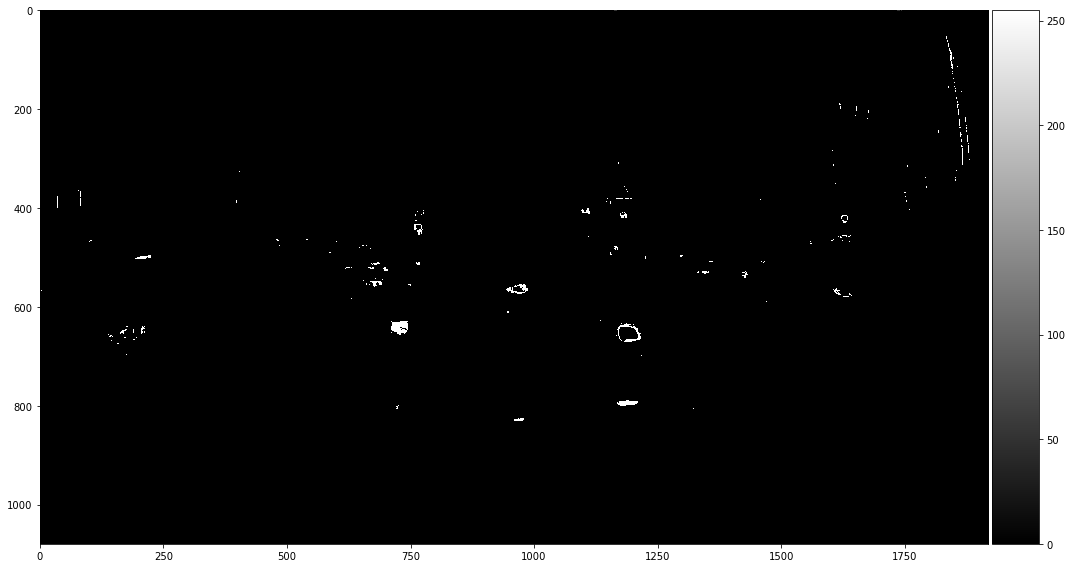

In [71]:
red_mask = cv2.inRange(hsv_road, lower_red, upper_red)

plt.figure(figsize=(15, 15))
imshow(red_mask, cmap='gray')

Более точный диапазон цветов определил вот этот человек [https://github.com/L4HG/Traffic_light_detector/blob/master/traffic_light_detect.py](). Такое простое решение дало точность > 90% определения момента переключения светофора.

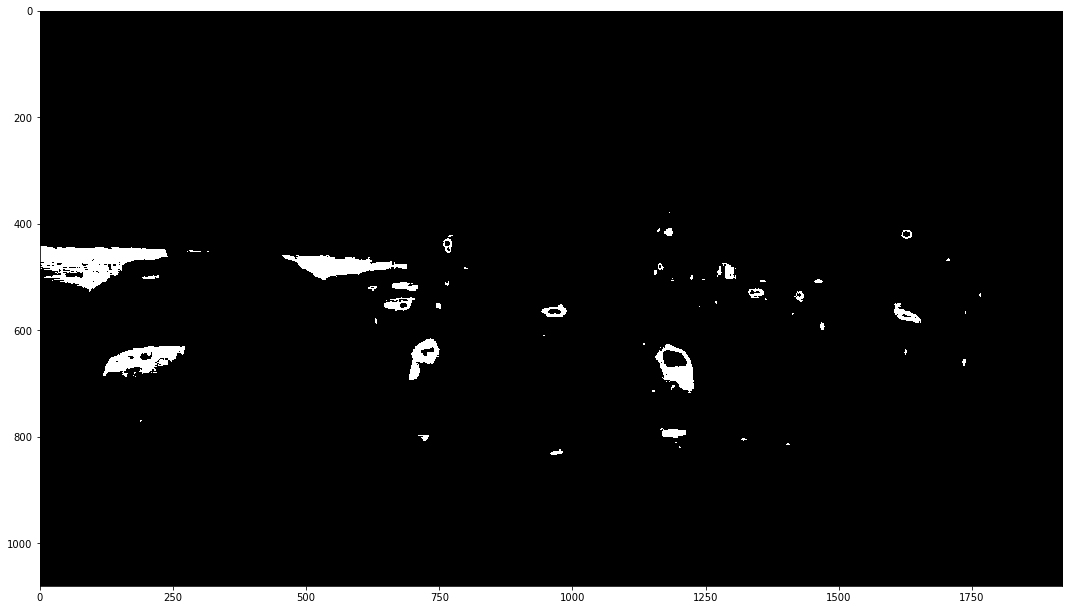

In [72]:
lower_red = np.array([0, 70, 80], dtype = "uint8")
upper_red = np.array([19, 255, 255], dtype = "uint8")

lower_violet = np.array([160, 85, 110], dtype = "uint8")
upper_violet = np.array([180, 255, 255], dtype = "uint8")

red_mask = cv2.inRange(hsv_road, lower_red, upper_red) + cv2.inRange(hsv_road, lower_violet, upper_violet)

plt.figure(figsize=(15, 15))
imshow(red_mask, cmap='gray')